# Time-analysis of the DFT

In [1]:
%run ../setup.ipynb

As we've seen in previous chapters, the {ref}`naive method <dft-naive>` for computing the DFT uses two nested loops:

```{code-block} python
---
lineno-start: 1
---

def dft(x):
    '''Compute the Discrete Fourier Transform of an input signal x of N samples.'''
    
    N = len(x)
    X = np.zeros(N, dtype=np.complex)
    
    # Compute each X[m]
    for m in range(N):
        
        # Compute similarity between x and the m'th basis
        for n in range(N):
            X[m] = X[m] + x[n] * np.exp(-2j * np.pi * m * n / N)
            
    return X
```

The outer loop (starting at line 8) iterates over the $N$ different analysis frequencies: $m=0, 1, 2, \dots, N-1$.

Within each of these loop is another loop (starting at line 11) that iterates over the *samples* to compute similarity between the input signal $x$ and the reference complex sinusoid ${e^{-2\pi \cdot \mathrm{j} \cdot m \cdot n / N}}$.
Each step of this inner loop requires a constant amount of work doing basic arithmetic: multiplying, dividing, adding, and storing numbers.
The exact amount of work here isn't too important: what matters is that it's the same amount for every choice of $m$ and $n$.

Since there are $N$ steps in the outer loop, and $N$ steps inside each of those, line 12 is executed $N^2$ times in total.
This means that as the length of the input grows (i.e., more samples are added), the amount of work grows *quadratically*, as shown below.

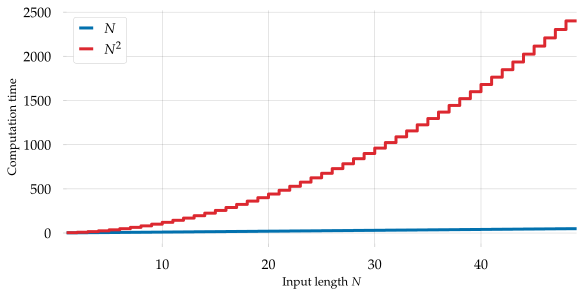

In [2]:
fig, ax = plt.subplots(figsize=figaspect(0.5))

x = np.arange(1, 50)
y = x**2

ax.step(x, x, label=r'$N$')
ax.step(x, y, label=r'$N^2$')
ax.set(xlabel='Input length $N$', ylabel='Computation time')
ax.legend(loc='upper left')
glue('nsquared', fig, display=False)

```{glue:figure} nsquared
A comparison of linear ($N$) and quadratic ($N^2$) growth.
```

This quadratic growth in computation time establishes a baseline for DFT computation:
the naive algorithm takes time proportional to $N^2$.
Fast Fourier Transform methods aim to reduce this to scale more favorably as the input length increases.

Coming from the other direction, any algorithm for computing the DFT must take *at least* $N$ steps, because it must see all $N$ samples at least once, e.g., to compute $X[0] = \sum_n x[n]$.
This gives us a lower bound on the computation time, and the goal will be to get as close to this lower bound as possible.